# Airline Passenger Satisfaction Level Predictor

## Description

### Objective

`Predicting airline passenger satisfaction using:`<br>
`1. Decision Tree`<br>
`2. Random Forest`<br>
`3. Ada Boost`<br>
`4. Gradient Boost`

### Problem Statement

`1. What influences the level of passenger satisfaction ?`
<br>
`2. What is the best model so far ?`
<br>
`3. How much data is wrongly predicted ?`
<br>
`4. How to improve the model prediction ?`

## Working Area
### 1. Import Libraries

In [117]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Splitting
from sklearn.model_selection import train_test_split

# Outliers handling
from feature_engine.outliers import Winsorizer

# Data Preprocessing
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OrdinalEncoder

# Feature selection
from sklearn.feature_selection import SelectKBest, f_classif, chi2

# Import models
from sklearn.model_selection import StratifiedKFold
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Model evaluation
from sklearn.metrics import accuracy_score, classification_report, plot_confusion_matrix, roc_auc_score

# Model saving
import joblib
import json

# Ignore the warning notes
import warnings
warnings.filterwarnings("ignore")

### 2. Data Loading

In [2]:
# Import dataset as dataframe
df = pd.read_csv('airline_passenger_satisfaction.csv')

In [3]:
# Brief check dataset top 5 rows
df.head()

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,1,Male,48,First-time,Business,Business,821,2,5.0,3,...,3,5,2,5,5,5,3,5,5,Neutral or Dissatisfied
1,2,Female,35,Returning,Business,Business,821,26,39.0,2,...,5,4,5,5,3,5,2,5,5,Satisfied
2,3,Male,41,Returning,Business,Business,853,0,0.0,4,...,3,5,3,5,5,3,4,3,3,Satisfied
3,4,Male,50,Returning,Business,Business,1905,0,0.0,2,...,5,5,5,4,4,5,2,5,5,Satisfied
4,5,Female,49,Returning,Business,Business,3470,0,1.0,3,...,3,4,4,5,4,3,3,3,3,Satisfied


In [4]:
# Brief check dataset bottom 5 rows
df.tail()

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
129875,129876,Male,28,Returning,Personal,Economy Plus,447,2,3.0,4,...,5,1,4,4,4,5,4,4,4,Neutral or Dissatisfied
129876,129877,Male,41,Returning,Personal,Economy Plus,308,0,0.0,5,...,5,2,5,2,2,4,3,2,5,Neutral or Dissatisfied
129877,129878,Male,42,Returning,Personal,Economy Plus,337,6,14.0,5,...,3,3,4,3,3,4,2,3,5,Neutral or Dissatisfied
129878,129879,Male,50,Returning,Personal,Economy Plus,337,31,22.0,4,...,4,4,5,3,3,4,5,3,5,Satisfied
129879,129880,Female,20,Returning,Personal,Economy Plus,337,0,0.0,1,...,4,2,4,2,2,2,3,2,1,Neutral or Dissatisfied


In [5]:
# Showing dataset description
pd.options.display.max_colwidth = 200
pd.read_csv('data_dictionary.csv')

,Field,Description
0,ID,Unique passenger identifier
1,Gender,Gender of the passenger (Female/Male)
2,Age,Age of the passenger
3,Customer Type,Type of airline customer (First-time/Returning)
4,Type of Travel,Purpose of the flight (Business/Personal)
5,Class,Travel class in the airplane for the passenger seat
6,Flight Distance,Flight distance in miles
7,Departure Delay,Flight departure delay in minutes
8,Arrival Delay,Flight arrival delay in minutes
9,Departure and Arrival Time Convenience,"Satisfaction level with the convenience of the flight departure and arrival times from 1 (lowest) to 5 (highest) - 0 means ""not applicable"""


Statement :<br>
Since the categorical features are encoded, therefore split the categorical and numerical features manually.<br>
Dataset source : https://www.kaggle.com/datasets/mysarahmadbhat/airline-passenger-satisfaction

In [6]:
# Make list for numerical and categorical data
num_raw = ['Age' , 'Flight Distance' , 'Departure Delay' , 'Arrival Delay']
cat_raw = ['Gender' , 'Customer Type' , 'Type of Travel' , 'Class' , 'Departure and Arrival Time Convenience' , 'Ease of Online Booking' , 'Check-in Service' , 'Online Boarding' , 'Gate Location' , 'On-board Service' , 'Seat Comfort' , 'Leg Room Service' , 'Cleanliness' , 'Food and Drink' , 'In-flight Service' , 'In-flight Wifi Service' , 'In-flight Entertainment' , 'Baggage Handling']

In [7]:
# Drop the duplicate rows
df = df.drop_duplicates()

In [8]:
# Drop passenger ID
df = df.drop('ID', axis = 1)

In [9]:
# Matches the dataset description with the column type
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129880 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   Gender                                  129880 non-null  object 
 1   Age                                     129880 non-null  int64  
 2   Customer Type                           129880 non-null  object 
 3   Type of Travel                          129880 non-null  object 
 4   Class                                   129880 non-null  object 
 5   Flight Distance                         129880 non-null  int64  
 6   Departure Delay                         129880 non-null  int64  
 7   Arrival Delay                           129487 non-null  float64
 8   Departure and Arrival Time Convenience  129880 non-null  int64  
 9   Ease of Online Booking                  129880 non-null  int64  
 10  Check-in Service                        1298

Statement :<br>
All columns match the description. whereas in arrival delay column, there are several null rows.

In [10]:
# Check the number of null rows
print(round(df['Arrival Delay'].isnull().sum() / len(df) * 100,2), '% from dataset, is null rows.')

0.3 % from dataset, is null rows.


Statement :<br>
Since the number of null rows is so small compared to overall dataset, therefore the null rows will be terminated.

In [11]:
# Drop the null rows
df = df.dropna()

### 3. Exploratory Data Analysis (EDA)
Since customer satisfaction is important, therefore the data exploration will be performed in conditions where the customer is satisfied and not.

In [12]:
# Make function to calculate the column composition
def PieComposition(dataframe, column):
    palette_color = sns.color_palette('muted')
    data = {}
    freq = {}
    datalen = len(dataframe[column].unique())
    x = np.arange(datalen)
    dq = dataframe[column].unique()
    for i in x:
        data[i] = dq[i]
        freq[i] = dataframe[column][dataframe[column] == dq[i]].value_counts().sum()
    data = list(data.values())
    freq = list(freq.values())
    plt.pie(freq, labels = data, colors=palette_color, autopct='%.0f%%')

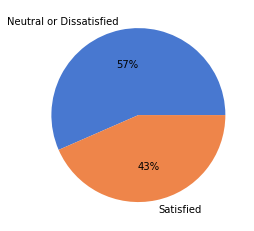

In [13]:
# Check the target composition
PieComposition(df, 'Satisfaction') # Satisfaction

Statement :<br>
There is no data imbalance in target composition, where the number of Dissatisfied and Satisfied customers is nearly equal.

In [14]:
# Check categorical columns unique value
for (colname,colval) in df[df.select_dtypes(include=['object']).columns.tolist()].iteritems():
    print(colname, colval.unique())

Gender ['Male' 'Female']
Customer Type ['First-time' 'Returning']
Type of Travel ['Business' 'Personal']
Class ['Business' 'Economy' 'Economy Plus']
Satisfaction ['Neutral or Dissatisfied' 'Satisfied']


Statement :<br>
No high cardinality was found in unencoded categorical variables.

In [15]:
# Making new dataframe that contains Satisfied customers only
df_sat = df[df['Satisfaction'] == 'Satisfied']
df_diss = df[df['Satisfaction'] == 'Neutral or Dissatisfied']

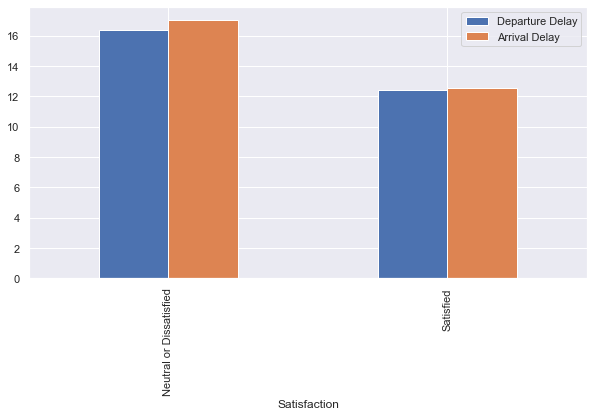

In [16]:
# Compare delay duration between satisfaction value 
sns.set(rc={"figure.figsize":(10, 5)})
df[['Departure Delay' , 'Arrival Delay', 'Satisfaction']].groupby('Satisfaction').mean().plot.bar()
plt.show()

Statement :<br>
Satisfied customers average delay duration for departure and arrival is relatively shorter than Dissatisfied customers. Which is seems to be normal.

Airport services


<AxesSubplot:xlabel='Satisfaction'>

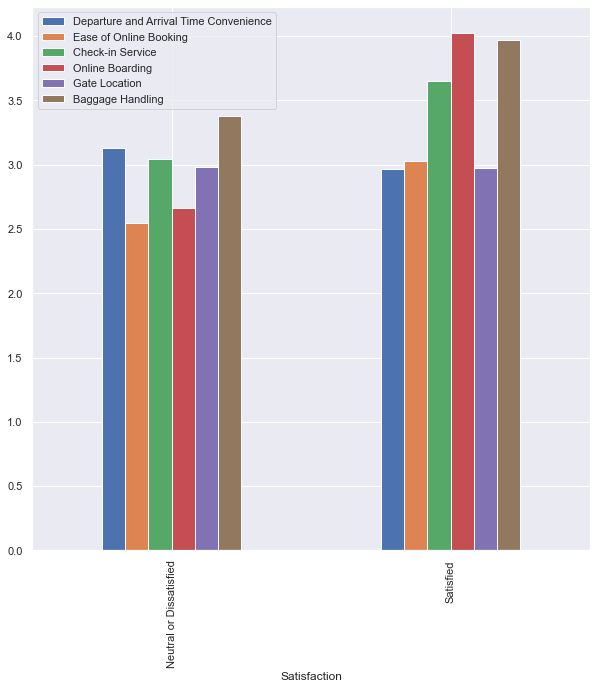

In [17]:
# Explore satisfaction level in airport and airline

# Making list of Airport and Airline services
AP_list = ['Departure and Arrival Time Convenience' , 'Ease of Online Booking' , 'Check-in Service' , 'Online Boarding' , 'Gate Location', 'Baggage Handling' , 'Satisfaction']
AC_list = ['On-board Service' , 'Seat Comfort' , 'Leg Room Service' , 'Cleanliness' , 'Food and Drink' , 'In-flight Service' , 'In-flight Wifi Service' , 'In-flight Entertainment' , 'Satisfaction']

# Compare between satisfied and not
sns.set(rc={"figure.figsize":(10, 10)})
print('Airport services')
df[AP_list].groupby('Satisfaction').mean().plot.bar()

In [18]:
# Showing statistical differences
df[AP_list].groupby('Satisfaction').mean()

,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,Baggage Handling
Satisfaction,,,,,,
Neutral or Dissatisfied,3.130229,2.549512,3.043045,2.658846,2.980184,3.374681
Satisfied,2.962497,3.026554,3.648786,4.025648,2.972646,3.966638


Statement :<br>
During airport services, average satisfied experience of Online Boarding between satisfied and dissatisfied passenger is the most huge difference among all of airport services experience. While in second place of highest difference of average satisfied experience is Check-in service. I conclude that Online Boarding and Check-in service is really affecting the passenger satisfaction in scale of airport services.

Aircraft services


<AxesSubplot:xlabel='Satisfaction'>

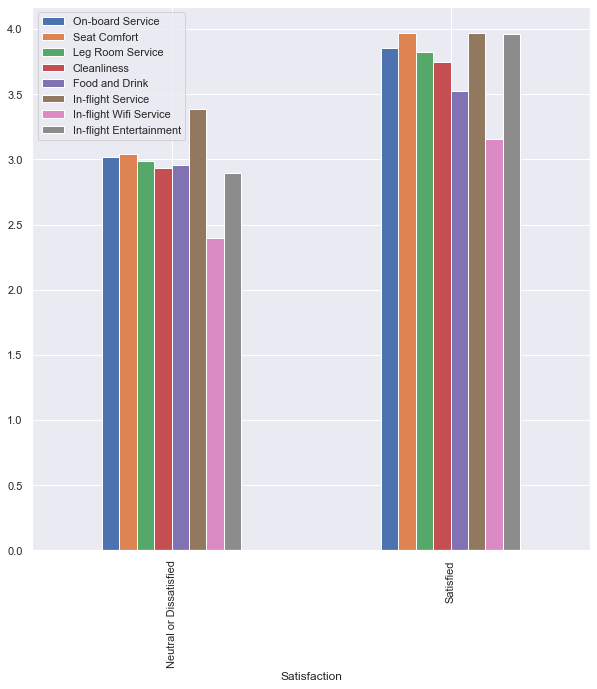

In [19]:
# Compare between satisfied and not
sns.set(rc={"figure.figsize":(10, 10)})
print('Airline services')
df[AC_list].groupby('Satisfaction').mean().plot.bar()

In [20]:
# Showing statistical differences
df[AC_list].groupby('Satisfaction').mean()

,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment
Satisfaction,,,,,,,,
Neutral or Dissatisfied,3.019570,3.038525,2.990495,2.932851,2.958525,3.389662,2.398470,2.892236
Satisfied,3.856475,3.966176,3.820376,3.746134,3.525061,3.971277,3.158135,3.964345


Statement :<br>
Another story is happening in airline services, where all of the experiences level of satisfied about airline services for satisfied and dissatisfied passenger is different for every services with almost the same number. Because of that, I conclude that airline services have more impact than airport services in affecting the passenger satisfaction.

Text(0.5, 1.0, 'Dissatisfied')

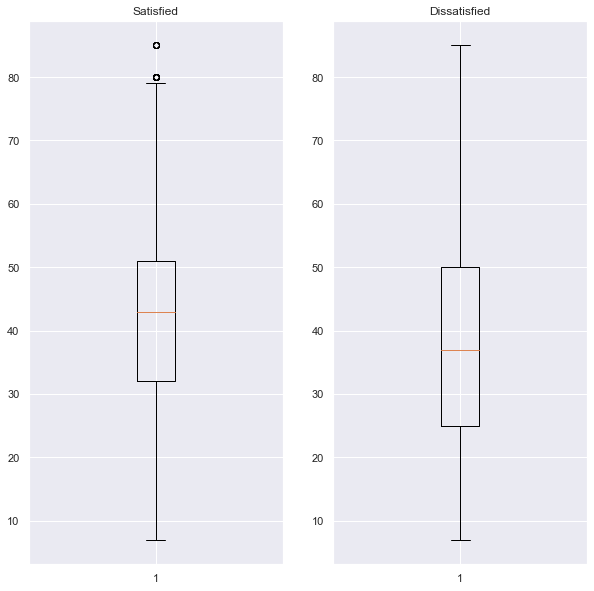

In [21]:
# Compare age to satisfaction level
fig, axs = plt.subplots(1, 2)
axs[0].boxplot(df_sat['Age'])
axs[0].set_title('Satisfied')
axs[1].boxplot(df_diss['Age'])
axs[1].set_title('Dissatisfied')

Statement :<br>
Using boxplot, I can temporarily conclude that passenger under 40 years old likely have higher standards to satisfy in-flight since the number of dissatisfied passenger under 40 years old is more than satisfied passenger of the same age.

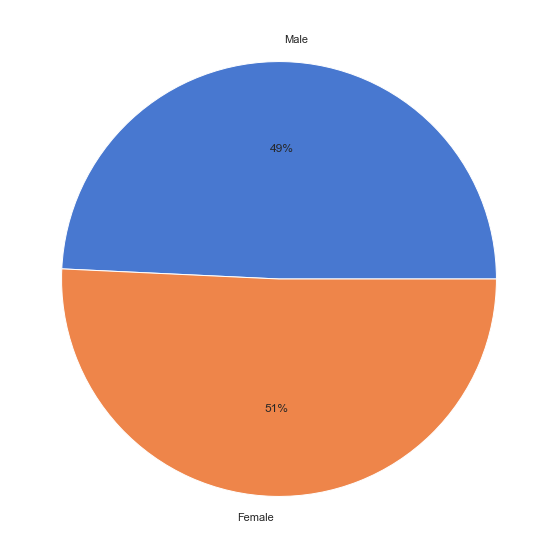

In [22]:
# Check every categorical columns composition
PieComposition(df, 'Gender') # Gender

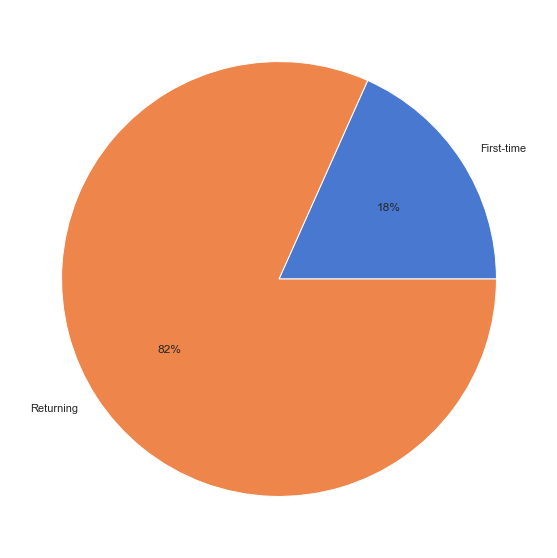

In [23]:
PieComposition(df, 'Customer Type') # Customer Type

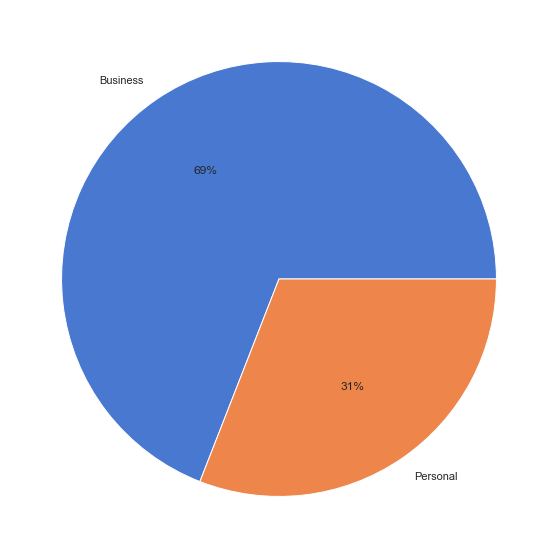

In [24]:
PieComposition(df, 'Type of Travel') # Type of Travel

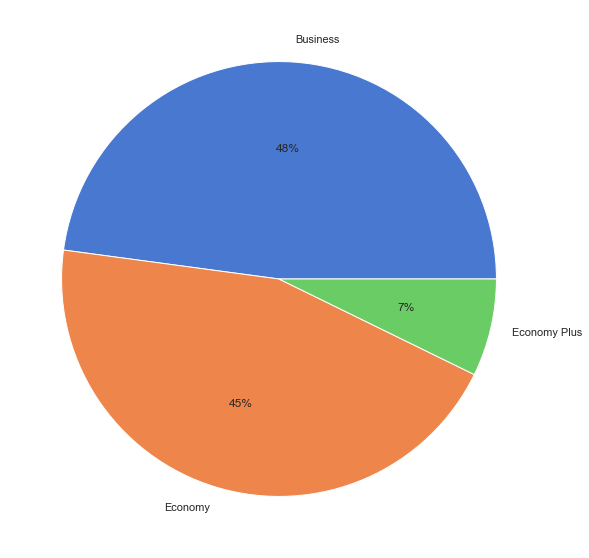

In [25]:
PieComposition(df, 'Class') # Class

Statement :<br>
The number of male and female passenger is nearly equal, while the type of customer that returning is way bigger than first-time passenger which could be an opportunity to create a 'member program' to keep them loyal. In other side, most of passenger travel for business needs rather than personal needs. And the last thing is economy plus is the least frequently used, which could be indicating that the advantages to be obtained from using economy plus is not significantly different from economy and business class. Therefore I recommend to change the features that will be obtained by passenger from using economy plus class in order to gain the number of passenger that using economy plus class instead of regular economy class.

### 4. Data Preprocessing

In [26]:
# Split train test set with Inference Model
data_inf = df.sample(10, random_state = 1)

# Remove Inference Model from dataset
data_train_test = df.drop(data_inf.index)

# Reset index for both dataset
data_train_test.reset_index(drop = True , inplace = True)
data_inf.reset_index(drop = True , inplace = True)

In [27]:
# Split data features and target
X = data_train_test.drop('Satisfaction', axis = 1)
y = pd.DataFrame(data_train_test['Satisfaction'])

# Split data train dan test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 1) # 30% data will be used as test set

In [28]:
# Make a function for showing numerical outliers
def Show_LLUL(df, variable, multiplier = 1.5):
    if df[variable].skew() > -0.5 and df[variable].skew() < 0.5:
        LL = df[variable].mean() - 3 * df[variable].std()
        UL = df[variable].mean() + 3 * df[variable].std() 
    else:
        Q1 = df[variable].quantile(0.25)
        Q3 = df[variable].quantile(0.75)
        IQR = Q3 - Q1
        LL = Q1 - multiplier * IQR
        UL = Q3 + multiplier * IQR
    out_df = df[(df[variable] > UL) | (df[variable] < LL)]
    out_df.sort_values(variable, ascending = False, inplace = True)
    print(out_df.shape[0] / df.shape[0] * 100, '% is considered as outliers')
    return out_df.iloc[np.r_[0:6, -6:-1]]

In [29]:
# Check all numerical train set data outliers

# Check Age column
Show_LLUL(X_train, 'Age')

0.020963666655633158 % is considered as outliers


,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,...,Gate Location,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling
100241,Male,85,First-time,Business,Business,486,8,1.0,4,4,...,4,5,3,4,3,3,4,3,4,4
66918,Female,85,First-time,Business,Business,617,58,59.0,3,3,...,4,1,1,3,1,3,2,3,3,3
32582,Male,85,Returning,Business,Business,1666,0,5.0,1,1,...,1,2,3,4,3,3,1,3,4,3
89063,Male,85,First-time,Business,Business,1187,0,7.0,3,3,...,4,4,5,3,5,3,1,3,3,3
66125,Female,85,First-time,Business,Business,586,0,0.0,2,2,...,3,4,5,3,5,2,2,2,2,1
39294,Female,85,Returning,Business,Business,1689,0,0.0,5,5,...,5,4,2,3,2,2,3,3,4,4
50279,Male,85,Returning,Business,Economy,86,65,73.0,5,5,...,5,1,2,3,2,2,2,2,4,3
81068,Female,85,First-time,Business,Business,899,0,0.0,2,2,...,4,3,3,4,3,2,3,2,2,4
68831,Male,85,Returning,Business,Business,3732,1,0.0,4,4,...,4,3,3,3,3,3,3,3,3,3
32567,Female,85,Returning,Business,Business,101,0,0.0,3,3,...,3,3,3,3,3,2,2,4,1,3


Statement :<br>
Since there's no policy that limits the flight passenger age, and the age that's considered as outliers is still a reasonable number. Hence, I conclude that it is a natural outliers. 

In [30]:
# Check Flight Distance column
Show_LLUL(X_train, 'Flight Distance')

2.2011849988414816 % is considered as outliers


,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,...,Gate Location,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling
31748,Female,33,Returning,Business,Business,4983,0,0.0,1,1,...,1,1,4,4,4,4,3,1,4,5
31749,Female,52,Returning,Business,Business,4983,16,0.0,5,5,...,5,3,3,3,3,3,2,3,3,5
31690,Female,45,Returning,Personal,Economy,4983,2,0.0,1,3,...,2,5,1,2,1,3,4,3,2,3
31691,Male,38,Returning,Business,Economy Plus,4983,2,0.0,4,4,...,4,4,4,3,4,4,5,4,3,5
31755,Female,62,Returning,Personal,Economy Plus,4983,0,0.0,2,3,...,3,1,4,3,4,3,1,3,2,4
31753,Female,47,Returning,Personal,Economy,4983,0,0.0,3,1,...,4,3,3,3,3,1,2,1,3,5
37916,Male,31,Returning,Business,Business,3737,70,59.0,5,5,...,5,2,4,2,4,4,3,5,4,3
89123,Female,43,Returning,Business,Business,3737,43,35.0,3,3,...,3,3,4,3,3,2,3,4,3,4
6305,Female,38,Returning,Business,Business,3737,0,0.0,4,0,...,1,2,4,2,3,3,2,0,2,2
79615,Female,29,Returning,Business,Business,3737,172,156.0,5,4,...,5,4,5,4,5,5,5,5,3,5


Statement :<br>
Since the longest non-stop commercial flight is above than 8000 miles, therefore if there is no flight distance that exceeds 8000 miles will be considered as natural outliers. <br>
Source : https://thepointsguy.com/news/the-worlds-longest-nonstop-flights-updated/

In [31]:
# Check Departure Delay column
Show_LLUL(X_train, 'Departure Delay',3)

8.824600311144948 % is considered as outliers


,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,...,Gate Location,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling
73208,Female,47,Returning,Personal,Economy,1120,1592,1584.0,2,2,...,3,4,2,4,2,2,3,2,2,4
69417,Male,32,Returning,Business,Business,2916,1305,1280.0,2,2,...,2,4,5,5,5,5,3,2,3,4
73219,Male,8,Returning,Personal,Economy,1144,1128,1115.0,5,2,...,2,4,1,3,1,2,3,2,4,5
4885,Male,49,Returning,Business,Business,1959,1017,1011.0,1,1,...,1,4,4,4,4,4,4,1,4,5
63460,Female,39,Returning,Business,Business,1696,951,940.0,4,4,...,4,1,1,3,1,1,1,1,2,3
8314,Male,47,Returning,Business,Business,2187,933,920.0,5,4,...,4,4,4,5,4,4,4,4,5,5
10637,Male,33,Returning,Business,Business,2015,49,45.0,5,5,...,5,3,5,4,5,5,5,5,5,5
19424,Male,30,Returning,Business,Business,3175,49,36.0,3,3,...,3,1,2,5,2,2,4,3,2,1
65488,Female,52,Returning,Business,Business,1781,49,39.0,1,1,...,1,4,5,4,4,2,4,1,4,4
100435,Female,44,First-time,Business,Economy Plus,328,49,44.0,3,3,...,3,1,5,2,5,5,4,2,5,4


<AxesSubplot:>

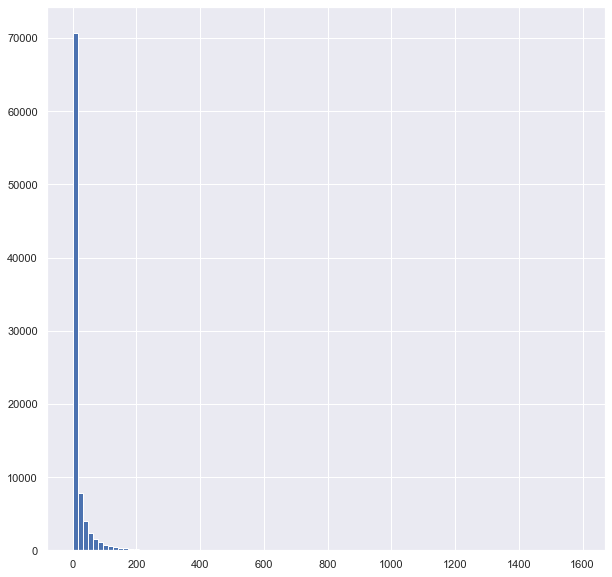

In [32]:
# Plot the Departure Delay distribution
X_train['Departure Delay'].hist( bins = 100 )

In [33]:
# Showing Departure Delay column statistical parameters
X_train['Departure Delay'].describe()

count    90633.000000
mean        14.588152
std         38.143005
min          0.000000
25%          0.000000
50%          0.000000
75%         12.000000
max       1592.000000
Name: Departure Delay, dtype: float64

Statement :<br>
The Departure Delay distribution is actually quite normal with right tail outliers while the maximum value is far higher than Q3 data. Since the number of outliers data is above than 5%, therefore the capping method will be performed instead of trimming the dataset.

In [34]:
# Check Arrival Delay column
Show_LLUL(X_train, 'Arrival Delay',3)

8.268511469332363 % is considered as outliers


,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,...,Gate Location,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling
73208,Female,47,Returning,Personal,Economy,1120,1592,1584.0,2,2,...,3,4,2,4,2,2,3,2,2,4
69417,Male,32,Returning,Business,Business,2916,1305,1280.0,2,2,...,2,4,5,5,5,5,3,2,3,4
73219,Male,8,Returning,Personal,Economy,1144,1128,1115.0,5,2,...,2,4,1,3,1,2,3,2,4,5
4885,Male,49,Returning,Business,Business,1959,1017,1011.0,1,1,...,1,4,4,4,4,4,4,1,4,5
63460,Female,39,Returning,Business,Business,1696,951,940.0,4,4,...,4,1,1,3,1,1,1,1,2,3
83397,Male,43,First-time,Business,Business,577,921,924.0,3,3,...,2,4,5,5,5,3,3,3,5,5
111012,Male,37,First-time,Business,Business,1173,12,53.0,3,3,...,1,4,2,5,2,2,4,3,2,4
50111,Female,52,Returning,Business,Business,109,40,53.0,4,4,...,4,4,4,4,4,5,4,1,4,1
3256,Male,29,Returning,Business,Business,3945,56,53.0,2,3,...,2,4,1,5,1,1,3,1,1,3
97198,Female,34,Returning,Business,Economy Plus,670,34,53.0,4,4,...,4,2,1,1,1,1,4,1,1,3


<AxesSubplot:>

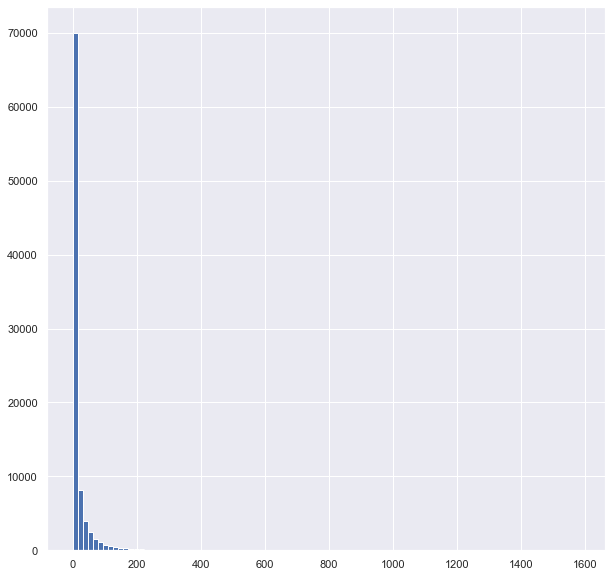

In [35]:
# Plot the Departure Delay distribution
X_train['Arrival Delay'].hist( bins = 100 )

In [36]:
# Showing Arrival Delay column statistical parameters
X_train['Arrival Delay'].describe()

count    90633.000000
mean        15.012501
std         38.578830
min          0.000000
25%          0.000000
50%          0.000000
75%         13.000000
max       1584.000000
Name: Arrival Delay, dtype: float64

Statement :<br>
Thing that happened between Departure and Arrival Delay is the same. Therefore, the Arrival Delay will be treated the same way as Departure Delay.

In [37]:
# Making function for winsorizer
winsorizer = Winsorizer(capping_method='iqr', tail = 'right', fold = 3)

# Capping the outlier
X_train_capped = winsorizer.fit_transform(X_train[['Departure Delay' , 'Arrival Delay']])

# Subtitute the uncapped data with the capped data
X_train[['Departure Delay' , 'Arrival Delay']] = X_train_capped

In [38]:
# Check categorical columns unique value in train set
for (colname,colval) in X_train[X_train.select_dtypes(include=['object']).columns.tolist()].iteritems():
    print(colname, colval.unique())

Gender ['Female' 'Male']
Customer Type ['Returning' 'First-time']
Type of Travel ['Business' 'Personal']
Class ['Business' 'Economy Plus' 'Economy']


Statement :<br>
Since there is no ordinal categories, therefore there will be only nominal encoder.

In [39]:
# Check the numerical variable distribution for scaling
X_train[num_raw].skew()

Age               -0.009469
Flight Distance    1.105380
Departure Delay    1.608885
Arrival Delay      1.640917
dtype: float64

Statament :<br>
Age : Normal distribution -> StandardScaler<br>
Flight Distance, Departure Delay, Arrival Delay : Skewed Distribution -> MinMaxScaler

In [40]:
# List of encoded features
encoded_features = ['Departure and Arrival Time Convenience' , 'Ease of Online Booking' , 'Check-in Service' , 'Online Boarding' , 'Gate Location' , 'On-board Service' , 'Seat Comfort' , 'Leg Room Service' , 'Cleanliness' , 'Food and Drink' , 'In-flight Service'	, 'In-flight Wifi Service' , 'In-flight Entertainment' , 'Baggage Handling' ]

# List of unencoded categorical features
numeric_features = ['Gender' , 'Customer Type' , 'Type of Travel' , 'Class']

# List of unscaled numerical features based on their distribution type
nor_num_features = ['Age']
skew_num_features = ['Flight Distance' , 'Departure Delay' , 'Arrival Delay']

# All features and processed features
all_feat = numeric_features + nor_num_features + skew_num_features + encoded_features
pro_feat = numeric_features + nor_num_features + skew_num_features

In [41]:
# Construct transformer pipelines for each feature type

# Categorical features
nominal_transformer = Pipeline(steps=[
    ('ordinal' , OrdinalEncoder())])

# Numerical features
normal_transformer = Pipeline(steps=[
    ('norscalar' , StandardScaler())])
skew_transformer = Pipeline(steps=[
    ('skewscalar' , MinMaxScaler())])

In [42]:
# Combine transformer with column transformer
preprocessor = ColumnTransformer(transformers=[
('nominal', nominal_transformer , numeric_features ),
('norscalar', normal_transformer , nor_num_features ),
('skewscalar', skew_transformer , skew_num_features ),
('encoded' , 'passthrough', encoded_features)
])

In [43]:
# Construct a pipeline
ScalEnd = Pipeline(steps=[('preprocessor' , preprocessor) ])

In [44]:
# Make a new dataframe with scaled and encoded value
X_train_new = pd.DataFrame(ScalEnd.fit_transform(X_train), columns = all_feat)

In [45]:
# Feature selection

# Split the train set into each type of column
X_train_num = X_train_new[num_raw]
X_train_cat = X_train_new[cat_raw]

In [46]:
# ANOVA's method to look for significant differences between numerical features and categorical target
select_ANOV = SelectKBest(score_func=f_classif, k = 4)
num_list = select_ANOV.fit(X_train_num, y_train)
num_result = pd.Series(num_list.scores_)
num_result.index = X_train_num.columns
num_result.sort_values(ascending = False)

Flight Distance    8657.326972
Age                1625.050605
Arrival Delay       747.690373
Departure Delay     503.881424
dtype: float64

In [47]:
# Chi Square Method to seacrh the most relevant categorical features
select_chi = SelectKBest(score_func = chi2, k = 8)
cat_list = select_chi.fit(X_train_cat, y_train)
cat_result = pd.Series(cat_list.scores_)
cat_result.index = X_train_cat.columns
cat_result.sort_values(ascending = False)

Online Boarding                           12807.361328
Type of Travel                            12712.601534
Class                                     11934.161701
In-flight Entertainment                    7703.149770
Seat Comfort                               5663.316509
In-flight Wifi Service                     4819.531420
On-board Service                           4618.324034
Cleanliness                                4570.855339
Leg Room Service                           4540.609748
Check-in Service                           2442.297811
Food and Drink                             2272.222259
Baggage Handling                           2166.744582
In-flight Service                          2068.631387
Ease of Online Booking                     1860.129755
Customer Type                               570.204763
Departure and Arrival Time Convenience      195.256544
Gender                                        3.990377
Gate Location                                 0.106037
dtype: flo

Statement :<br>
The feature selection is based on features with highest relevance and/or significance score.<br>
Numerical features : Flight Distance, Age, Arrival Delay, Departure Delay<br>
Categorical features : Online Boarding, Type of Travel, Class, In-flight Entertainment, Seat Comfort, In-flight Wifi Service, On-board Service, Cleanliness, Leg Room Service.

In [48]:
# Make final pipeline that only processing the selected features

# List of encoded features
encoded_features = ['Online Boarding' , 'On-board Service' , 'Seat Comfort' , 'Leg Room Service' , 'Cleanliness' , 'In-flight Wifi Service' , 'In-flight Entertainment']

# List of unencoded categorical features
numeric_features = ['Type of Travel' , 'Class']

# List of unscaled numerical features based on their distribution type
nor_num_features = ['Age']
skew_num_features = ['Flight Distance' , 'Departure Delay' , 'Arrival Delay']

# All features and processed features
all_feat = numeric_features + nor_num_features + skew_num_features + encoded_features
pro_feat = numeric_features + nor_num_features + skew_num_features

In [49]:
# Construct transformer pipelines for each feature type

# Categorical features
nominal_transformer = Pipeline(steps=[
    ('ordinal' , OrdinalEncoder())])

# Numerical features
normal_transformer = Pipeline(steps=[
    ('norscalar' , StandardScaler())])
skew_transformer = Pipeline(steps=[
    ('skewscalar' , MinMaxScaler())])

In [50]:
# Combine transformer with column transformer
preprocessor = ColumnTransformer(transformers=[
('nominal', nominal_transformer , numeric_features ),
('norscalar', normal_transformer , nor_num_features ),
('skewscalar', skew_transformer , skew_num_features ),
('encoded' , 'passthrough', encoded_features)])

In [51]:
# Construct a final pipeline
ScalEnd = Pipeline(steps=[('preprocessor' , preprocessor)])

In [52]:
# Transform train and test dataset into scaled and encoded set and select necessary features only
X_train = ScalEnd.fit_transform(X_train)
X_test = ScalEnd.transform(X_test)

### 5. Model Definition
1. Decision Tree :
- Algorithm : Spliting data sets until it is able to be recognized
- Pros : Has no special requirements for data preparation
- Cons : Not efficient, time consuming
2. Random Forest Classifier :
- Algorithm : Collection of many decision trees with the highest accuracy
- Pros : Can handle linear and non-linear relationships, provide accuracy and balance the bias-variance trade-off well
- Cons : Not easily interpretable, can be computationally intensive for large datasets
3. AdaBoost Classfier :
- Algorithm : Ensembling a lot of Decision Tree with 1 split only
- Pros : Less prone to overfitting
- Cons : Needs a quality dataset
4. Gradient Boosting Classfier :
- Algorithm : Make a base learner based on errors prediction to get a fit learner
- Pros : Lots of hyperparameter flexibility, no data pre-processing required, handles missing data
- Cons : Prone to overfitting, time and memory consuming

In [87]:
# Define base model
DT_Base = DecisionTreeClassifier()
RF_Base = RandomForestClassifier()
AB_Base = AdaBoostClassifier()
GB_Base = GradientBoostingClassifier()

In [88]:
# Defining parameter for tuning the models
DT_params = {
    'criterion' : ['gini' , 'log_loss'],
    'min_samples_split' : [2,5],
    'random_state' : [1]}
RF_params = {
    'n_estimators' : [50, 100],
    'criterion' : ['gini' , 'entropy'],
    'random_state' : [1]}
AB_params = {
    'n_estimators' : [20, 100],
    'algorithm' : ['SAMME' , 'SAMME.R'],
    'random_state' : [1]}
GB_params = {
    'loss' : ['log_loss' , 'exponential'],
    'n_estimators' : [25,50],
    'random_state' : [1]}

In [89]:
# Defining models with hyperparameters
DT_grid = HalvingGridSearchCV(DT_Base, param_grid = DT_params, scoring = 'accuracy', cv = 10, return_train_score = True)
RF_grid = HalvingGridSearchCV(RF_Base, param_grid = RF_params, scoring = 'accuracy', cv = 10, return_train_score = True)
AB_grid = HalvingGridSearchCV(AB_Base, param_grid = AB_params, scoring = 'accuracy', cv = 10, return_train_score = True)
GB_grid = HalvingGridSearchCV(GB_Base, param_grid = GB_params, scoring = 'accuracy', cv = 10, return_train_score = True)

Statement :<br>
Since satisfied and dissatisfied passangers need a different treatment, therefore predicting both is important. Scoring method for hyperparameters tuning will be accuracy.

### 6. Model Training

In [101]:
# Base Models Training
DT_Base.fit(X_train, y_train)
RF_Base.fit(X_train, y_train)
AB_Base.fit(X_train, y_train)
GB_Base.fit(X_train, y_train)

GradientBoostingClassifier()

In [90]:
# Models training with hyperparameter tuning
DT_grid.fit(X_train, y_train)
RF_grid.fit(X_train, y_train)
AB_grid.fit(X_train, y_train)
GB_grid.fit(X_train, y_train)

Decision Tree Train Done
Random Forest Train Done
AdaBoost Train Done
Gradient Boosting Train Done


In [91]:
# Print all parameters with highest Recall score
print('Decision Tree')
print('Best Recall :', DT_grid.best_score_)
print('Best Params :', DT_grid.best_params_,'\n')
print('Random Forest')
print('Best Recall ::', RF_grid.best_score_)
print('Best Params :', RF_grid.best_params_,'\n')
print('AdaBoost')
print('Best Recall ::', AB_grid.best_score_)
print('Best Params :', AB_grid.best_params_,'\n')
print('GradientBoost')
print('Best Recall ::', GB_grid.best_score_)
print('Best Params :', GB_grid.best_params_,'\n')

Decision Tree
Best Recall : 0.9247514992385849
Best Params : {'criterion': 'log_loss', 'min_samples_split': 5, 'random_state': 1} 

Random Forest
Best Recall :: 0.9435084532329787
Best Params : {'criterion': 'entropy', 'n_estimators': 100, 'random_state': 1} 

AdaBoost
Best Recall :: 0.9113347065296284
Best Params : {'algorithm': 'SAMME.R', 'n_estimators': 100, 'random_state': 1} 

GradientBoost
Best Recall :: 0.9243211696315455
Best Params : {'loss': 'exponential', 'n_estimators': 50, 'random_state': 1} 



In [104]:
# Defining models with best parameters
DT_best = DT_grid.best_estimator_
RF_best = RF_grid.best_estimator_
AB_best = AB_grid.best_estimator_
GB_best = GB_grid.best_estimator_

# Train models with best parameters
DT_best.fit(X_train, y_train)
RF_best.fit(X_train, y_train)
AB_best.fit(X_train, y_train)
GB_best.fit(X_train, y_train)

GradientBoostingClassifier(loss='exponential', n_estimators=50, random_state=1)

In [103]:
# Base Models Predict Train set
y_DT_base_train = DT_Base.predict(X_train)
y_RF_base_train = RF_Base.predict(X_train)
y_AB_base_train = AB_Base.predict(X_train)
y_GB_base_train = GB_Base.predict(X_train)

# Base Models Predict Test set
y_DT_base_test = DT_Base.predict(X_test)
y_RF_base_test = RF_Base.predict(X_test)
y_AB_base_test = AB_Base.predict(X_test)
y_GB_base_test = GB_Base.predict(X_test)

In [105]:
# Tuned Models Predict Train set
y_DT_best_train = DT_best.predict(X_train)
y_RF_best_train = RF_best.predict(X_train)
y_AB_best_train = AB_best.predict(X_train)
y_GB_best_train = GB_best.predict(X_train)

# Predict test set using model with best parameters
y_DT_best_test = DT_best.predict(X_test)
y_RF_best_test = RF_best.predict(X_test)
y_AB_best_test = AB_best.predict(X_test)
y_GB_best_test = GB_best.predict(X_test)

### 7. Model Evaluation

In [106]:
# Calculate Recall score for base model
base_train_score = {
    'Decision Tree' : accuracy_score(y_train, y_DT_base_train),
    'Random Forest' : accuracy_score(y_train, y_RF_base_train),
    'Ada Boost' : accuracy_score(y_train, y_AB_base_train),
    'Gradient Boost' : accuracy_score(y_train, y_GB_base_train)  
}

base_test_score = {
    'Decision Tree' : accuracy_score(y_test, y_DT_base_test),
    'Random Forest' : accuracy_score(y_test, y_RF_base_test),
    'Ada Boost' : accuracy_score(y_test, y_AB_base_test),
    'Gradient Boost' : accuracy_score(y_test, y_GB_base_test)  
}

# Calculate Recall score for tuned model
best_train_score = {
    'Decision Tree' : accuracy_score(y_train, y_DT_best_train),
    'Random Forest' : accuracy_score(y_train, y_RF_best_train),
    'Ada Boost' : accuracy_score(y_train, y_AB_best_train),
    'Gradient Boost' : accuracy_score(y_train, y_GB_best_train)  
}

best_test_score = {
    'Decision Tree' : accuracy_score(y_test, y_DT_best_test),
    'Random Forest' : accuracy_score(y_test, y_RF_best_test),
    'Ada Boost' : accuracy_score(y_test, y_AB_best_test),
    'Gradient Boost' : accuracy_score(y_test, y_GB_best_test)  
}

In [107]:
# Make dataframe of score reports
all_reports = {}
all_reports['Base Model Train'] = base_train_score
all_reports['Base Model Test'] = base_test_score
all_reports['Tuned Model Train'] = best_train_score
all_reports['Tuned Model Test'] = best_test_score
pd.DataFrame(all_reports)

,Base Model Train,Base Model Test,Tuned Model Train,Tuned Model Test
Decision Tree,0.999989,0.921867,0.990169,0.924338
Random Forest,0.999978,0.944084,0.999989,0.943698
Ada Boost,0.911280,0.911389,0.911633,0.912033
Gradient Boost,0.929761,0.928174,0.924343,0.923592


Statement :<br>
Since all models showing the accuracy over than 75%, I'm going to focus more on Train Test accuracy score gap. As we can see, Decision Tree and Random Forest ( base and tuned model ) is suffering overfitting where the gap of train and test accuracy is more than 6%. While AdaBoost and Gradient Boosting  show tiny gap between train and test accuracy ( less than 1% ), which indicates goodfit models. Since Gradient Boosting Base Model showed the highest accuracy score yet smallest gap between train and test set, I conclude that Gradient Boosting Base Model is the most suitable model for this dataset.

In [108]:
# Gradient Boost Report
print('Gradient Boost Base Model Report \n Train Set')
print(classification_report(y_train, y_GB_base_train))
print('Test Set')
print(classification_report(y_test, y_GB_base_test))

Gradient Boost Base Model Report 
 Train Set
                         precision    recall  f1-score   support

Neutral or Dissatisfied       0.93      0.95      0.94     51142
              Satisfied       0.93      0.91      0.92     39491

               accuracy                           0.93     90633
              macro avg       0.93      0.93      0.93     90633
           weighted avg       0.93      0.93      0.93     90633

Test Set
                         precision    recall  f1-score   support

Neutral or Dissatisfied       0.93      0.94      0.94     22077
              Satisfied       0.93      0.91      0.92     16767

               accuracy                           0.93     38844
              macro avg       0.93      0.93      0.93     38844
           weighted avg       0.93      0.93      0.93     38844



Statement :<br>
The balance of precision and recall score for every target value, is indicated that the model is actually able to predict well and precisely. Besides that, there's no gap between train and test set score over than 2% for every target value in every scoring method.

In [111]:
# Calculate ROC-AUC score
y_GB_base_train_proba = GB_Base.predict_proba(X_train)[:, 1]
y_GB_base_test_proba = GB_Base.predict_proba(X_test)[:, 1]

auc_GB_train = roc_auc_score(y_train, y_GB_base_train_proba)
auc_GB_test = roc_auc_score(y_test, y_GB_base_test_proba)

print('Gradient Boost Base Model AUC - Train :', auc_GB_train)
print('Gradient Boost Base Model AUC - Test :', auc_GB_test)

Gradient Boost Base Model AUC - Train : 0.981610392393772
Gradient Boost Base Model AUC - Test : 0.9811046536404723


Statament :<br>
Same as classification report results, ROC_AUC score for Gradient Boost Base Model for train and test set is nearly equal to 1 yet slightly different which is lest than 1%. This is also indicates that the model is a goodfit model.

Gradient Boost Train set Confusion Matrix


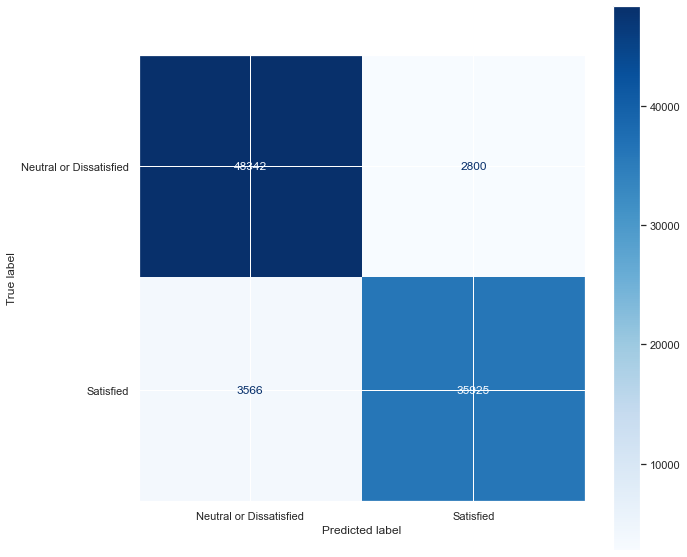

In [112]:
# Gradient Boost Base Model Confusion Matrix Train Set
print('Gradient Boost Train set Confusion Matrix')
disp = plot_confusion_matrix(GB_Base, X_train, y_train, cmap='Blues')

Gradient Boost Test set Confusion Matrix


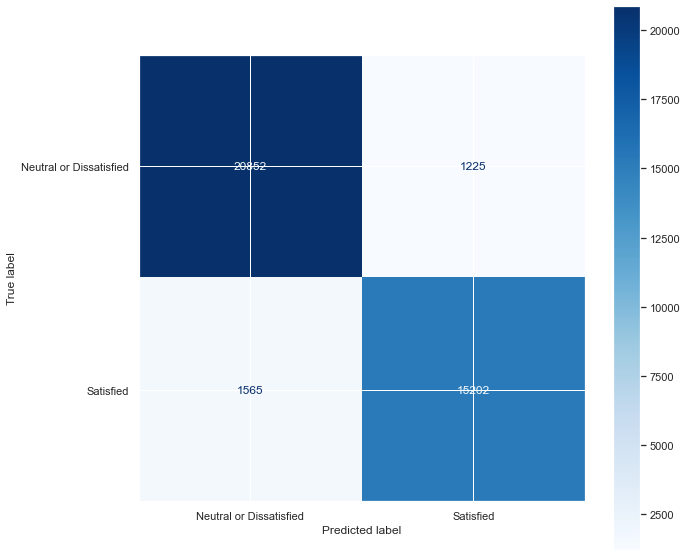

In [114]:
# Gradient Boost Base Model Confusion Matrix Test set
print('Gradient Boost Test set Confusion Matrix')
disp = plot_confusion_matrix(GB_Base, X_test, y_test, cmap='Blues')

Statement :<br>
Using confusion matrix we can see that the wrong predition results is so tiny compared to the correct prediction.<br>
Other than that there is no significant difference between Train and Test Confusion Matrix.<br>
For the final statement, I conclude that Gradient Boost Base Model that have been trained is goodfit model.

### 8. Model Saving

In [118]:
# Model saving
with open('PredictModel.pkl', 'wb') as file_1:
  joblib.dump(GB_Base, file_1)

with open('Processer.pkl', 'wb') as file_2:
  joblib.dump(ScalEnd, file_2)

### 9. Model Inference

In [116]:
# Preprocess the inference data using pipeline
data_inf_1 = ScalEnd.transform(data_inf)

# Predict using Gradient Boost Base Model
GB_Base_inf_pred_df = pd.DataFrame(GB_Base.predict(data_inf_1), columns = ['Satisfaction Predict'])

pd.concat([data_inf, GB_Base_inf_pred_df], axis = 1)

,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,...,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction,Satisfaction Predict
0,Male,24,Returning,Personal,Economy,212,0,7.0,4,2,...,5,5,5,5,4,2,5,3,Neutral or Dissatisfied,Neutral or Dissatisfied
1,Female,42,First-time,Business,Economy,259,68,60.0,3,3,...,3,2,3,3,3,3,3,4,Neutral or Dissatisfied,Neutral or Dissatisfied
2,Male,43,Returning,Business,Business,2139,2,0.0,4,4,...,5,4,5,2,4,4,4,4,Satisfied,Satisfied
3,Female,51,Returning,Business,Business,1076,0,0.0,2,1,...,5,5,4,3,5,2,5,5,Satisfied,Satisfied
4,Male,31,Returning,Business,Business,3070,0,0.0,4,4,...,4,4,4,4,5,4,4,4,Satisfied,Satisfied
5,Female,47,Returning,Personal,Economy Plus,237,0,7.0,5,2,...,5,2,4,3,1,2,1,1,Neutral or Dissatisfied,Neutral or Dissatisfied
6,Female,22,Returning,Business,Business,1751,0,0.0,4,4,...,4,4,4,4,5,4,4,4,Satisfied,Satisfied
7,Female,23,First-time,Business,Economy,984,0,0.0,3,3,...,4,4,5,5,3,3,5,2,Neutral or Dissatisfied,Neutral or Dissatisfied
8,Female,7,First-time,Business,Economy,1155,11,0.0,3,3,...,2,5,2,2,4,3,2,3,Neutral or Dissatisfied,Neutral or Dissatisfied
9,Male,41,Returning,Personal,Economy,1027,0,0.0,5,1,...,1,4,3,3,4,1,3,5,Neutral or Dissatisfied,Neutral or Dissatisfied


### 10. Conclusions
#### EDA
1. Satisfied customers average delay duration for departure and arrival is relatively shorter than Dissatisfied customers. Which is seems to be normal.
2. During airport services, average satisfied experience of Online Boarding between satisfied and dissatisfied passenger is the most huge difference among all of airport services experience. While in second place of highest difference of average satisfied experience is Check-in service. I conclude that Online Boarding and Check-in service is really affecting the passenger satisfaction in scale of airport services.
3. Another story is happening in airline services, where all of the experiences level of satisfied about airline services for satisfied and dissatisfied passenger is different for every services with almost the same number. Because of that, I conclude that airline services have more impact than airport services in affecting the passenger satisfaction.
4. Passenger under 40 years old likely have higher standards to satisfy in-flight since the number of dissatisfied passenger under 40 years old is more than satisfied passenger of the same age.
5. The number of male and female passenger is nearly equal, while the type of customer that returning is way bigger than first-time passenger which could be an opportunity to create a 'member program' to keep them loyal. In other side, most of passenger travel for business needs rather than personal needs. And the last thing is economy plus is the least frequently used, which could be indicating that the advantages to be obtained from using economy plus is not significantly different from economy and business class. Therefore I recommend to change the features that will be obtained by passenger from using economy plus class in order to gain the number of passenger that using economy plus class instead of regular economy class.
#### Model
1. Column that greatly affects passenger satisfaction are Flight Distance, Age, Arrival Delay, Departure Delay, Online Boarding, Type of Travel, Class, In-flight Entertainment, Seat Comfort, In-flight Wifi Service, On-board Service, Cleanliness, Leg Room Service. All aspects contained in these columns can be considered even more in order to increase passenger satisfaction.
2. Gradient Boosting Base Model is the most suitable model for this dataset.
3. The amount of incorrectly predicted data is very small, that I thought not to develop the model futher more in order not to suffer from overfitting possibilities.